✅ Libraries imported successfully
✅ Data loaded successfully
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Total records: 392,692
Daily Sales Summary:
--------------------------------------------------
Total days: 305
Average daily revenue: $29,138.39
Median daily revenue: $25,351.44
Max daily revenue: $184,329.66
Min daily revenue: $3,439.67

Monthly Sales Summary:
--------------------------------------------------
      Month  Monthly_Revenue
0   2010-12        570422.73
1   2011-01        568101.31
2   2011-02        446084.92
3   2011-03        594081.76
4   2011-04        468374.33
5   2011-05        677355.15
6   2011-06        660046.05
7   2011-07        598962.90
8   2011-08        644051.04
9   2011-09        950690.20
10  2011-10       1035642.45
11  2011-11       1156205.61
12  2011-12        517190.44


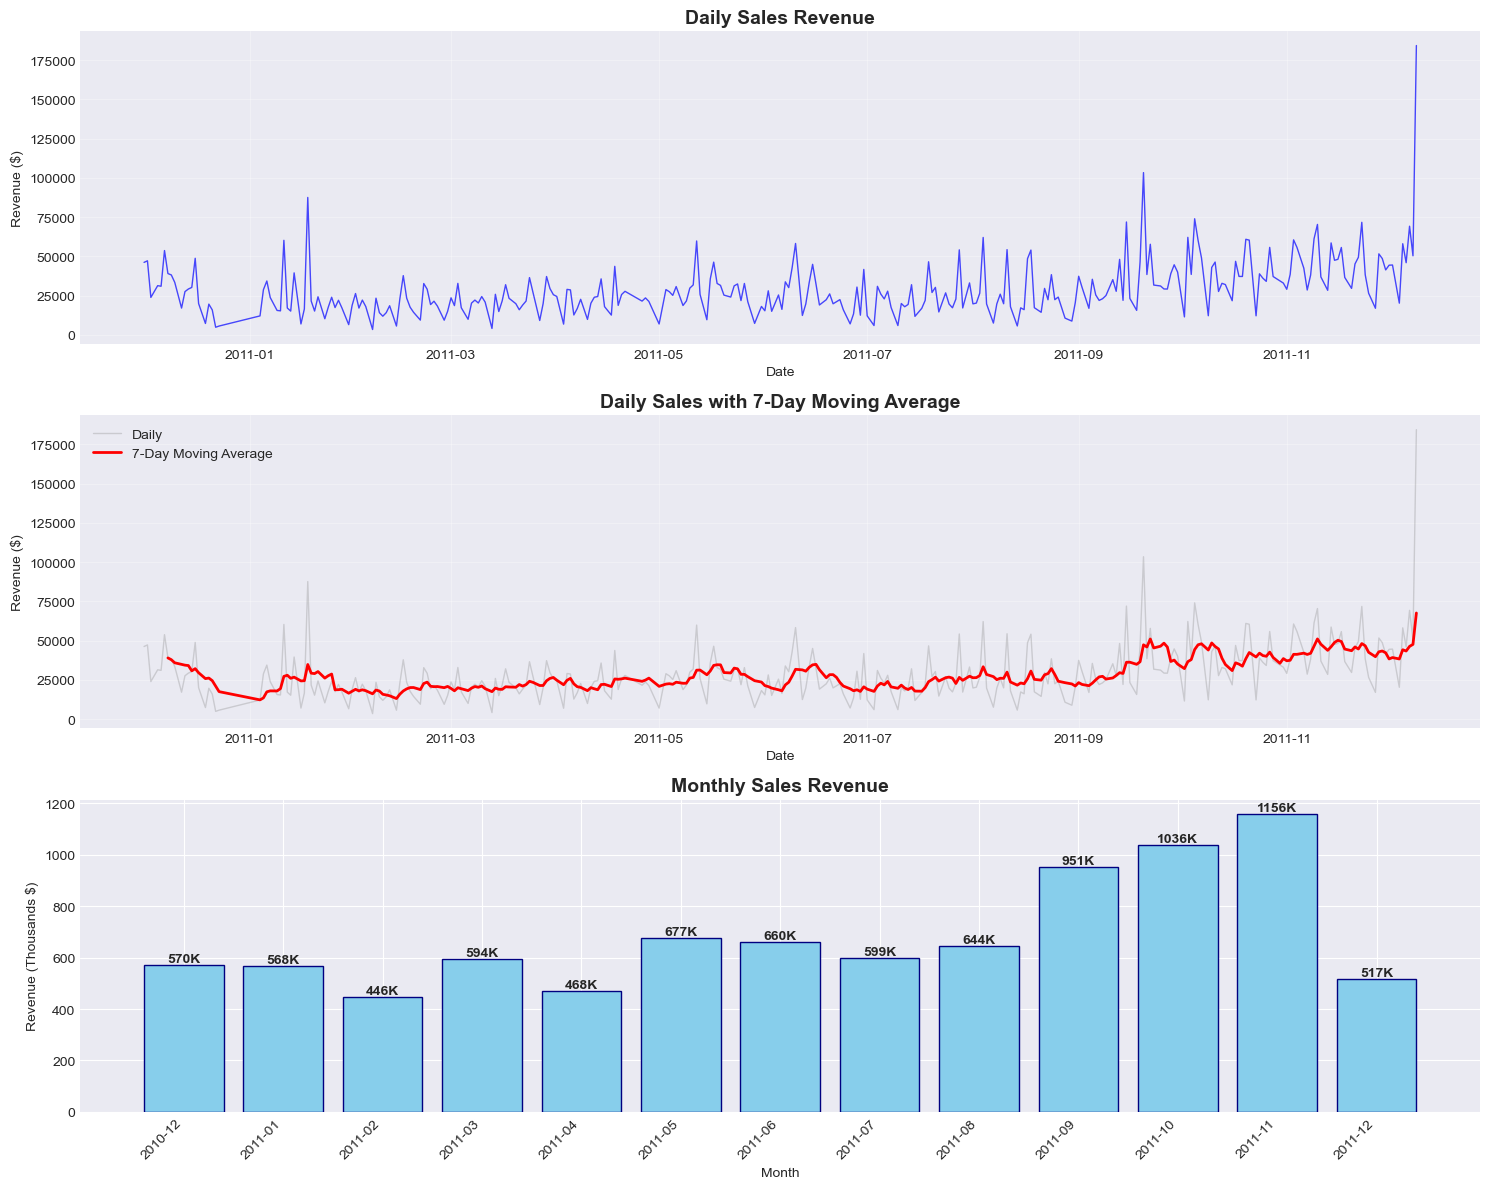

📊 Results of Dickey-Fuller Test for Daily Sales:
--------------------------------------------------
ADF Statistic: -0.370940
p-value: 0.914839
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572

❌ Conclusion: Series is NON-STATIONARY (fail to reject null hypothesis)


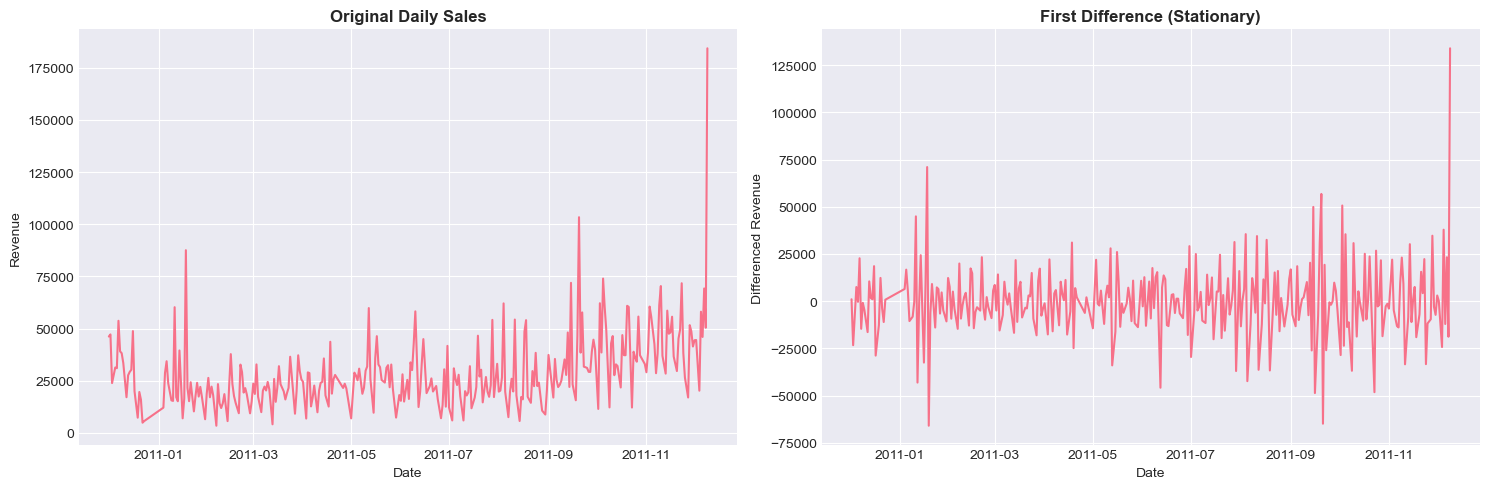

📊 Results of Dickey-Fuller Test for Differenced Sales:
--------------------------------------------------
ADF Statistic: -6.320954
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572

✅ Conclusion: Series is STATIONARY (reject null hypothesis)


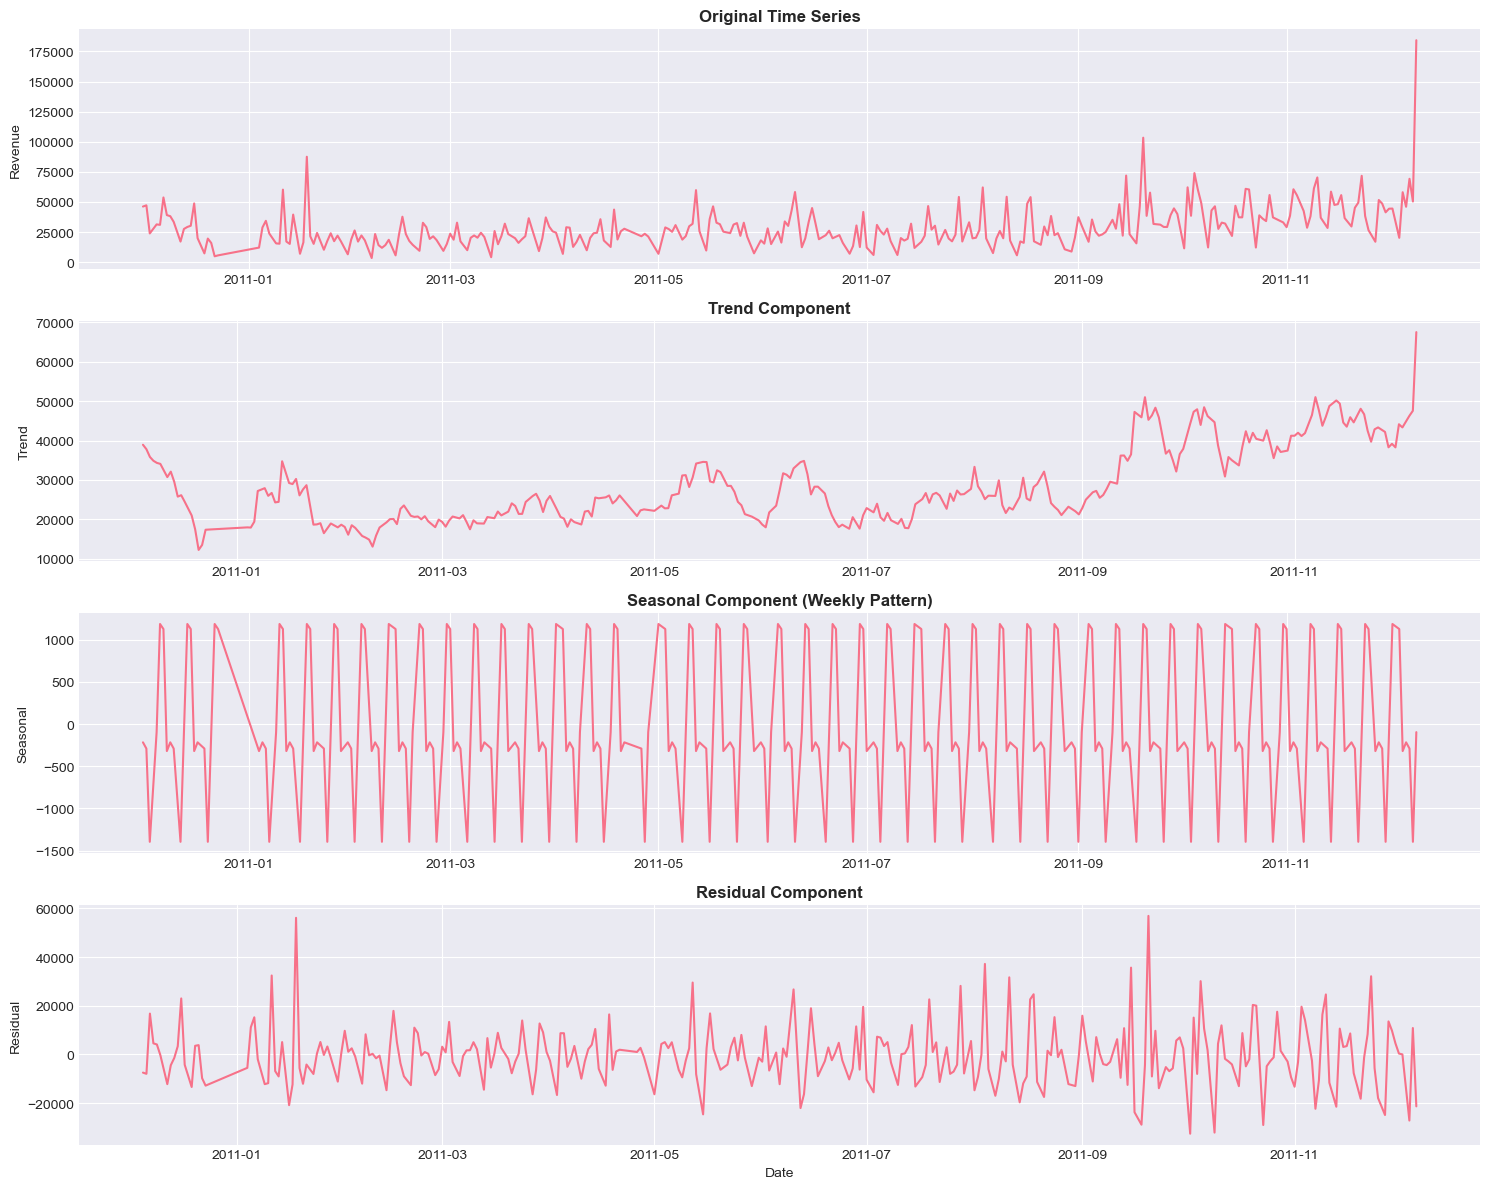

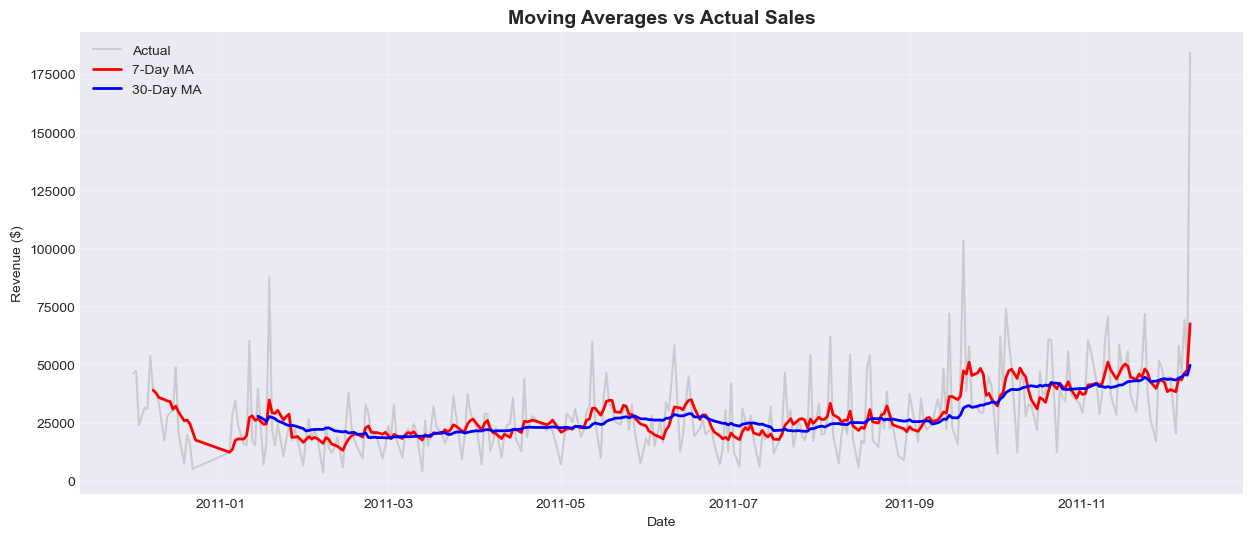

Training data: 244 days
Testing data: 61 days

📊 Holt-Winters Model Performance:
--------------------------------------------------
MAE: $21,059.96
RMSE: $27,273.94
MAPE: 67.18%


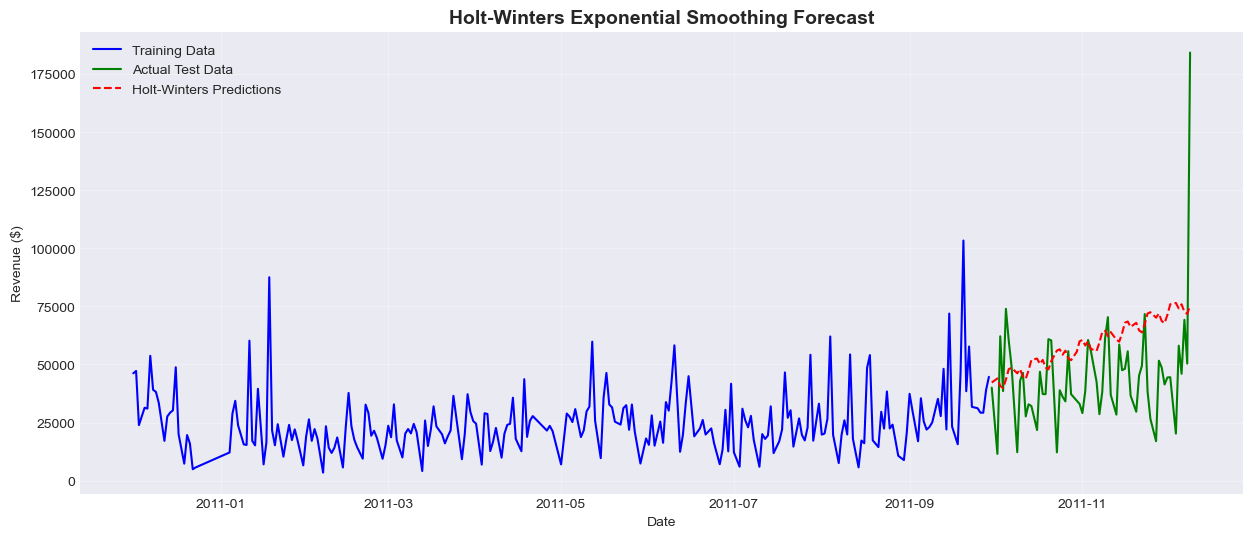

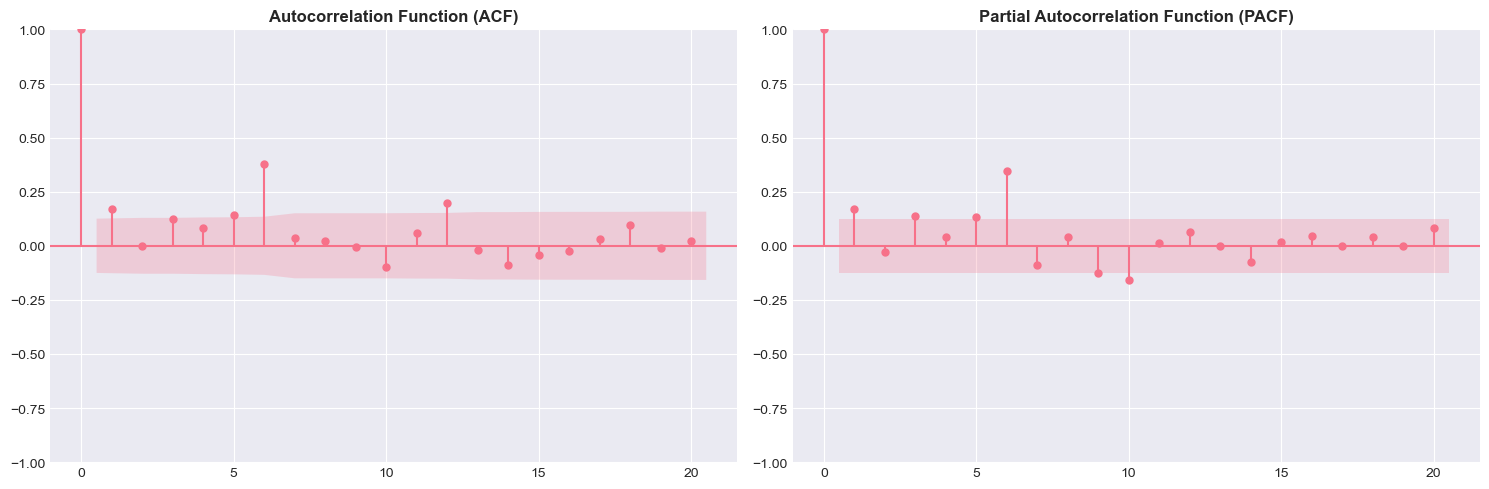

                               SARIMAX Results                                
Dep. Variable:          Daily_Revenue   No. Observations:                  244
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2638.256
Date:                Tue, 17 Feb 2026   AIC                           5288.511
Time:                        10:43:58   BIC                           5309.470
Sample:                             0   HQIC                          5296.953
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8088      0.063    -12.908      0.000      -0.932      -0.686
ar.L2         -0.8238      0.071    -11.674      0.000      -0.962      -0.685
ar.L3         -0.6573      0.067     -9.882      0.0

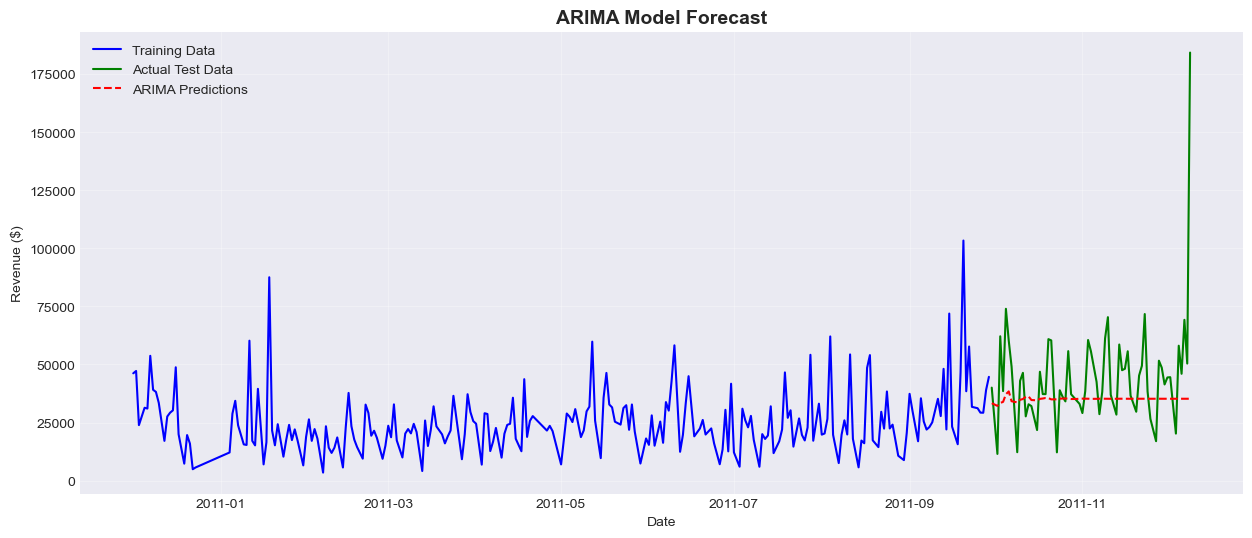


📊 MODEL COMPARISON
       Model          MAE         RMSE  MAPE (%)
Holt-Winters 21059.962377 27273.944637 67.184459
       ARIMA 15282.637282 25073.817989 35.457431


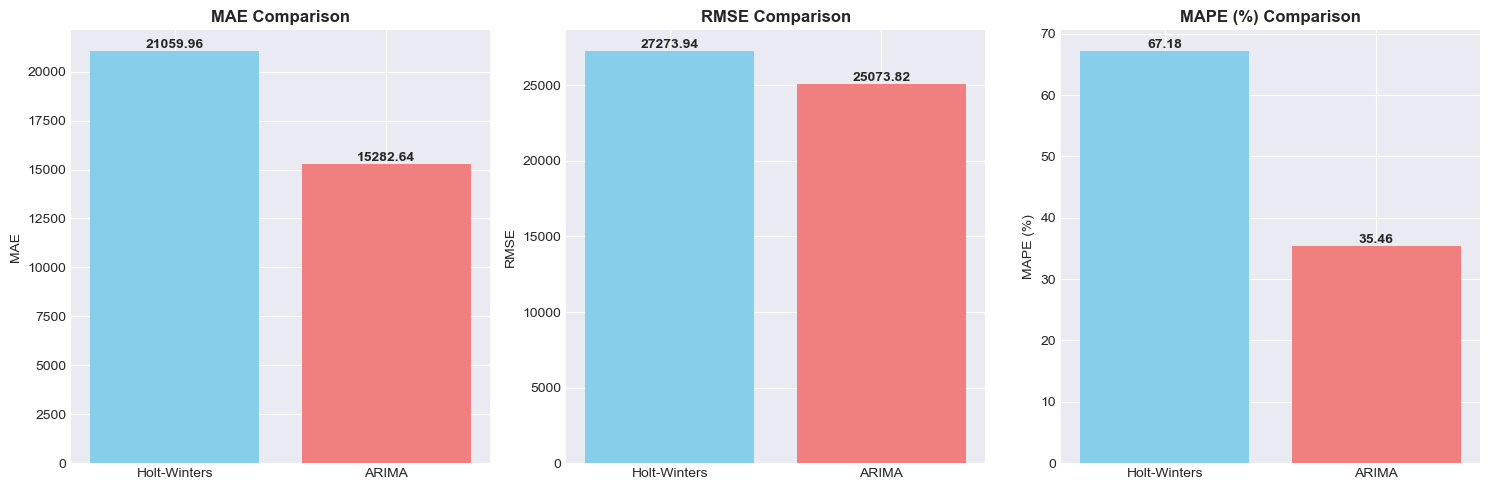


🔮 FUTURE FORECAST (Next 90 Days)
Total predicted revenue: $8,437,793.49
Average daily revenue: $93,753.26
Peak day: 131,164.54
Lowest day: 57,208.80

First 10 days forecast:
      Date  Predicted_Revenue
2011-12-10       57208.799547
2011-12-11       57646.854942
2011-12-12       58250.147788
2011-12-13       59603.872637
2011-12-14       63198.914023
2011-12-15       60898.232448
2011-12-16       64569.537474
2011-12-17       62872.601727
2011-12-18       63310.657122
2011-12-19       63913.949968


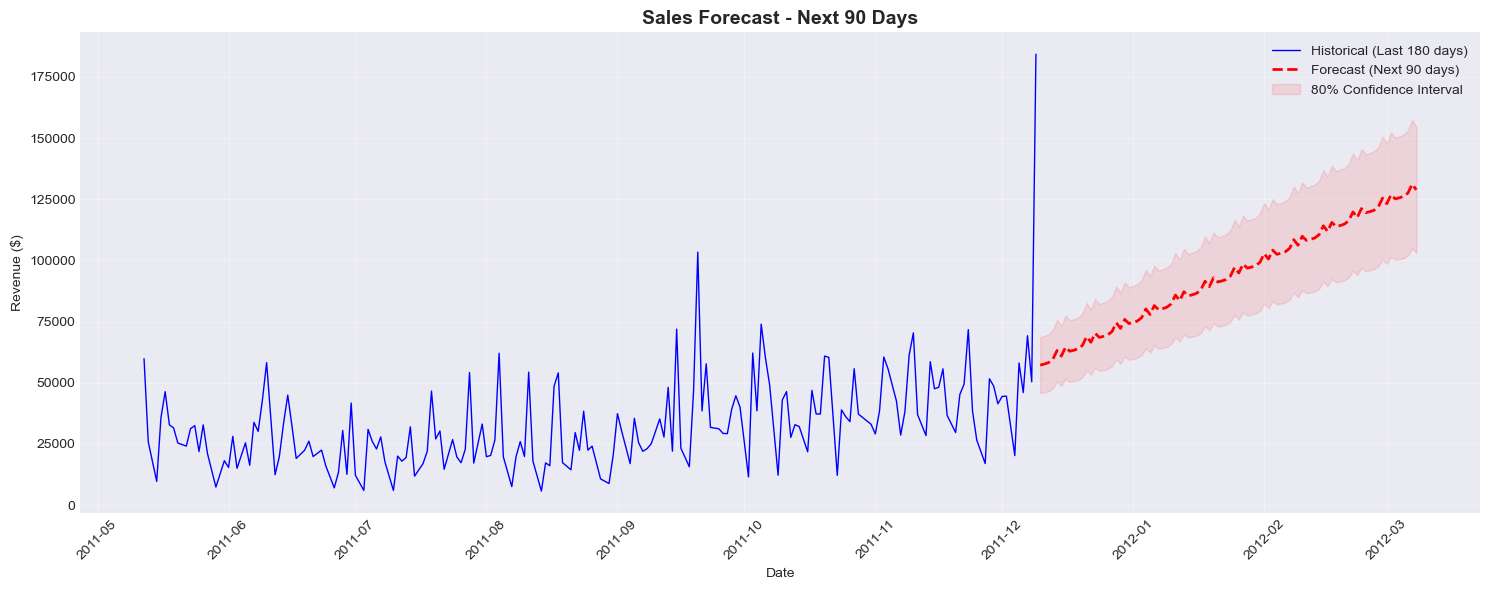


📅 MONTHLY FORECAST SUMMARY
  Month  Predicted_Revenue
2011-12       1.457269e+06
2012-01       2.716240e+06
2012-02       3.249612e+06
2012-03       1.014672e+06


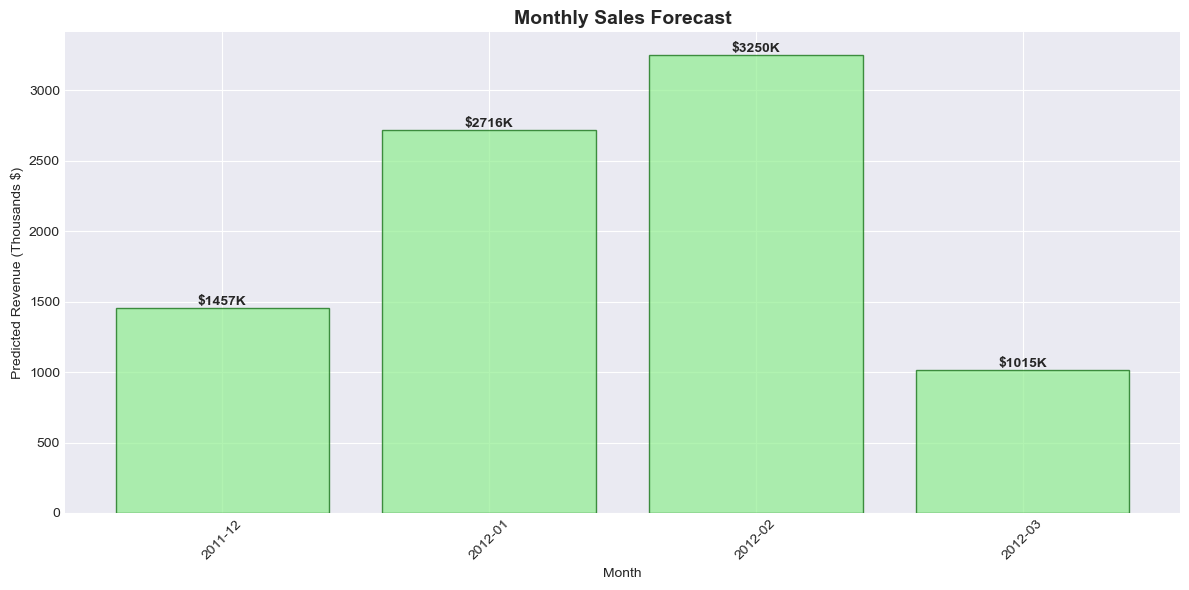


🎯 BUSINESS INSIGHTS FROM FORECAST

📊 FORECAST METRICS:
• Expected revenue next quarter: $8,437,793.49
• Expected daily average: $93,753.26
• Compared to historical avg: $29,138.39 (+221.8%)
• Peak day: 2012-03-07 ($131,164.54)
• Lowest day: 2011-12-10 ($57,208.80)

💡 RECOMMENDATIONS:
• Increase inventory by 222% to meet expected demand
• Staff accordingly for peak days (especially around March
• Plan promotions during low periods to boost sales
• Order additional stock for top-selling products
• Prepare marketing campaigns for expected busy periods
✅ Forecast saved to: ../data/processed/sales_forecast.csv
✅ Monthly forecast saved to: ../data/processed/monthly_forecast.csv

✅ TIME SERIES FORECASTING COMPLETE
✓ Analyzed daily and monthly sales patterns
✓ Tested multiple forecasting models
✓ Generated 90-day sales forecast
✓ Created business insights and recommendations
✓ Data saved for backend integration

🚀 Ready for backend API development!


In [1]:
# %% [markdown]
# # Step 4: Sales Forecasting with Time Series Analysis
# ## Predicting Future Sales for Business Planning

# %% [markdown]
# ### Import Libraries

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)

print("✅ Libraries imported successfully")

# %% [markdown]
# ### Load Data

# %%
# Load the enhanced dataset
df = pd.read_csv('../data/processed/online_retail_enhanced.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(f"✅ Data loaded successfully")
print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"Total records: {len(df):,}")

# %% [markdown]
# ## SECTION 1: Prepare Time Series Data

# %% [markdown]
# ### Daily Sales Aggregation

# %%
# Aggregate sales by day
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalRevenue'].sum().reset_index()
daily_sales.columns = ['Date', 'Daily_Revenue']
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])
daily_sales = daily_sales.sort_values('Date')

print("Daily Sales Summary:")
print("-" * 50)
print(f"Total days: {len(daily_sales)}")
print(f"Average daily revenue: ${daily_sales['Daily_Revenue'].mean():,.2f}")
print(f"Median daily revenue: ${daily_sales['Daily_Revenue'].median():,.2f}")
print(f"Max daily revenue: ${daily_sales['Daily_Revenue'].max():,.2f}")
print(f"Min daily revenue: ${daily_sales['Daily_Revenue'].min():,.2f}")

daily_sales.head()

# %%
# Monthly sales aggregation
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalRevenue'].sum().reset_index()
monthly_sales.columns = ['Month', 'Monthly_Revenue']
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

print("\nMonthly Sales Summary:")
print("-" * 50)
print(monthly_sales.round(2))

# %% [markdown]
# ### Visualize Sales Patterns

# %%
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Daily sales
axes[0].plot(daily_sales['Date'], daily_sales['Daily_Revenue'], color='blue', alpha=0.7, linewidth=1)
axes[0].set_title('Daily Sales Revenue', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Revenue ($)')
axes[0].grid(True, alpha=0.3)

# 7-day rolling average
daily_sales['7day_avg'] = daily_sales['Daily_Revenue'].rolling(window=7).mean()
axes[1].plot(daily_sales['Date'], daily_sales['Daily_Revenue'], alpha=0.3, color='gray', linewidth=1, label='Daily')
axes[1].plot(daily_sales['Date'], daily_sales['7day_avg'], color='red', linewidth=2, label='7-Day Moving Average')
axes[1].set_title('Daily Sales with 7-Day Moving Average', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Revenue ($)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Monthly sales
axes[2].bar(range(len(monthly_sales)), monthly_sales['Monthly_Revenue']/1000, color='skyblue', edgecolor='navy')
axes[2].set_title('Monthly Sales Revenue', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Revenue (Thousands $)')
axes[2].set_xticks(range(len(monthly_sales)))
axes[2].set_xticklabels(monthly_sales['Month'], rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(monthly_sales['Monthly_Revenue']/1000):
    axes[2].text(i, v, f'{v:.0f}K', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## SECTION 2: Check Stationarity

# %% [markdown]
# ### Augmented Dickey-Fuller Test
# This tests if the time series is stationary (required for some forecasting methods)

# %%
def check_stationarity(timeseries, title):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries.dropna())
    print(f'📊 Results of Dickey-Fuller Test for {title}:')
    print('-' * 50)
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    
    if result[1] <= 0.05:
        print("\n✅ Conclusion: Series is STATIONARY (reject null hypothesis)")
    else:
        print("\n❌ Conclusion: Series is NON-STATIONARY (fail to reject null hypothesis)")
    
    return result[1] <= 0.05

# Check daily sales stationarity
is_stationary = check_stationarity(daily_sales.set_index('Date')['Daily_Revenue'], 'Daily Sales')

# %% [markdown]
# ### If non-stationary, apply differencing

# %%
if not is_stationary:
    # Apply first difference
    daily_sales['Revenue_Diff'] = daily_sales['Daily_Revenue'].diff()
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Original
    axes[0].plot(daily_sales['Date'], daily_sales['Daily_Revenue'])
    axes[0].set_title('Original Daily Sales', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Revenue')
    
    # Differenced
    axes[1].plot(daily_sales['Date'], daily_sales['Revenue_Diff'])
    axes[1].set_title('First Difference (Stationary)', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Differenced Revenue')
    
    plt.tight_layout()
    plt.show()
    
    # Check stationarity of differenced series
    check_stationarity(daily_sales['Revenue_Diff'], 'Differenced Sales')

# %% [markdown]
# ## SECTION 3: Decompose Time Series

# %%
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Date as index for decomposition
ts_data = daily_sales.set_index('Date')['Daily_Revenue']

# Decompose (using additive model)
decomposition = seasonal_decompose(ts_data, model='additive', period=7)  # weekly seasonality

fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Original
axes[0].plot(ts_data)
axes[0].set_title('Original Time Series', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Revenue')

# Trend
axes[1].plot(decomposition.trend)
axes[1].set_title('Trend Component', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Trend')

# Seasonal
axes[2].plot(decomposition.seasonal)
axes[2].set_title('Seasonal Component (Weekly Pattern)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Seasonal')

# Residual
axes[3].plot(decomposition.resid)
axes[3].set_title('Residual Component', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## SECTION 4: Forecasting Methods

# %% [markdown]
# ### Method 1: Simple Moving Average

# %%
# Calculate moving averages
daily_sales['MA_7'] = daily_sales['Daily_Revenue'].rolling(window=7).mean()
daily_sales['MA_30'] = daily_sales['Daily_Revenue'].rolling(window=30).mean()

plt.figure(figsize=(15, 6))
plt.plot(daily_sales['Date'], daily_sales['Daily_Revenue'], alpha=0.3, color='gray', label='Actual')
plt.plot(daily_sales['Date'], daily_sales['MA_7'], color='red', linewidth=2, label='7-Day MA')
plt.plot(daily_sales['Date'], daily_sales['MA_30'], color='blue', linewidth=2, label='30-Day MA')
plt.title('Moving Averages vs Actual Sales', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# %% [markdown]
# ### Method 2: Exponential Smoothing (Holt-Winters)

# %%
# Prepare data for modeling
# Use last 80% for training, 20% for testing
train_size = int(len(daily_sales) * 0.8)
train = daily_sales['Daily_Revenue'][:train_size]
test = daily_sales['Daily_Revenue'][train_size:]

print(f"Training data: {len(train)} days")
print(f"Testing data: {len(test)} days")

# Fit Holt-Winters model
try:
    model = ExponentialSmoothing(
        train,
        seasonal_periods=7,  # weekly seasonality
        trend='add',
        seasonal='add',
        initialization_method='estimated'
    )
    fitted_model = model.fit()
    
    # Make predictions
    predictions = fitted_model.forecast(len(test))
    
    # Calculate error metrics
    mae = mean_absolute_error(test, predictions)
    rmse = np.sqrt(mean_squared_error(test, predictions))
    mape = np.mean(np.abs((test.values - predictions.values) / test.values)) * 100
    
    print("\n📊 Holt-Winters Model Performance:")
    print("-" * 50)
    print(f"MAE: ${mae:,.2f}")
    print(f"RMSE: ${rmse:,.2f}")
    print(f"MAPE: {mape:.2f}%")
    
    # Plot results
    plt.figure(figsize=(15, 6))
    plt.plot(daily_sales['Date'][:train_size], train, label='Training Data', color='blue')
    plt.plot(daily_sales['Date'][train_size:], test, label='Actual Test Data', color='green')
    plt.plot(daily_sales['Date'][train_size:], predictions, label='Holt-Winters Predictions', color='red', linestyle='--')
    plt.title('Holt-Winters Exponential Smoothing Forecast', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
except Exception as e:
    print(f"Error in Holt-Winters: {e}")

# %% [markdown]
# ### Method 3: ARIMA Model

# %%
# Find best ARIMA parameters using ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ACF plot
plot_acf(train.dropna(), lags=20, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)', fontsize=12, fontweight='bold')

# PACF plot
plot_pacf(train.dropna(), lags=20, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Fit ARIMA model
try:
    # ARIMA(5,1,0) - you can adjust these parameters based on ACF/PACF plots
    arima_model = ARIMA(train, order=(5,1,0))
    arima_fitted = arima_model.fit()
    
    print(arima_fitted.summary())
    
    # Make predictions
    arima_predictions = arima_fitted.forecast(len(test))
    
    # Calculate error metrics
    arima_mae = mean_absolute_error(test, arima_predictions)
    arima_rmse = np.sqrt(mean_squared_error(test, arima_predictions))
    arima_mape = np.mean(np.abs((test.values - arima_predictions.values) / test.values)) * 100
    
    print("\n📊 ARIMA Model Performance:")
    print("-" * 50)
    print(f"MAE: ${arima_mae:,.2f}")
    print(f"RMSE: ${arima_rmse:,.2f}")
    print(f"MAPE: {arima_mape:.2f}%")
    
    # Plot ARIMA results
    plt.figure(figsize=(15, 6))
    plt.plot(daily_sales['Date'][:train_size], train, label='Training Data', color='blue')
    plt.plot(daily_sales['Date'][train_size:], test, label='Actual Test Data', color='green')
    plt.plot(daily_sales['Date'][train_size:], arima_predictions, label='ARIMA Predictions', color='red', linestyle='--')
    plt.title('ARIMA Model Forecast', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
except Exception as e:
    print(f"Error in ARIMA: {e}")

# %% [markdown]
# ## SECTION 5: Compare Models

# %%
# Compare different forecasting methods
if 'predictions' in locals() and 'arima_predictions' in locals():
    comparison = pd.DataFrame({
        'Model': ['Holt-Winters', 'ARIMA'],
        'MAE': [mae, arima_mae],
        'RMSE': [rmse, arima_rmse],
        'MAPE (%)': [mape, arima_mape]
    })
    
    print("\n📊 MODEL COMPARISON")
    print("=" * 60)
    print(comparison.to_string(index=False))
    
    # Visualize comparison
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    metrics = ['MAE', 'RMSE', 'MAPE (%)']
    colors = ['skyblue', 'lightcoral']
    
    for i, metric in enumerate(metrics):
        axes[i].bar(['Holt-Winters', 'ARIMA'], comparison[metric], color=colors)
        axes[i].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
        axes[i].set_ylabel(metric)
        
        # Add value labels
        for j, v in enumerate(comparison[metric]):
            axes[i].text(j, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# %% [markdown]
# ## SECTION 6: Future Forecast (Next 90 Days)

# %%
# Use the best model for future forecast
# Let's use Holt-Winters as it often works well for retail data

try:
    # Fit model on entire dataset
    final_model = ExponentialSmoothing(
        daily_sales['Daily_Revenue'],
        seasonal_periods=7,
        trend='add',
        seasonal='add',
        initialization_method='estimated'
    )
    final_fitted = final_model.fit()
    
    # Forecast next 90 days
    forecast_days = 90
    forecast = final_fitted.forecast(forecast_days)
    
    # Create future dates
    last_date = daily_sales['Date'].iloc[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days, freq='D')
    
    # Create forecast dataframe
    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Revenue': forecast.values
    })
    
    print("\n🔮 FUTURE FORECAST (Next 90 Days)")
    print("=" * 60)
    print(f"Total predicted revenue: ${forecast.sum():,.2f}")
    print(f"Average daily revenue: ${forecast.mean():,.2f}")
    print(f"Peak day: {forecast.max():,.2f}")
    print(f"Lowest day: {forecast.min():,.2f}")
    
    print("\nFirst 10 days forecast:")
    print(forecast_df.head(10).to_string(index=False))
    
    # Plot historical + forecast
    plt.figure(figsize=(15, 6))
    
    # Historical data
    plt.plot(daily_sales['Date'][-180:], daily_sales['Daily_Revenue'][-180:], 
             label='Historical (Last 180 days)', color='blue', linewidth=1)
    
    # Forecast
    plt.plot(forecast_df['Date'], forecast_df['Predicted_Revenue'], 
             label='Forecast (Next 90 days)', color='red', linewidth=2, linestyle='--')
    
    # Confidence interval (approximate)
    plt.fill_between(forecast_df['Date'],
                     forecast_df['Predicted_Revenue'] * 0.8,
                     forecast_df['Predicted_Revenue'] * 1.2,
                     color='red', alpha=0.1, label='80% Confidence Interval')
    
    plt.title('Sales Forecast - Next 90 Days', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in forecasting: {e}")

# %% [markdown]
# ## SECTION 7: Monthly Forecast Summary

# %%
# Aggregate forecast by month
forecast_df['Month'] = forecast_df['Date'].dt.to_period('M')
monthly_forecast = forecast_df.groupby('Month')['Predicted_Revenue'].sum().reset_index()
monthly_forecast['Month'] = monthly_forecast['Month'].astype(str)

print("\n📅 MONTHLY FORECAST SUMMARY")
print("=" * 60)
print(monthly_forecast.to_string(index=False))

# Plot monthly forecast
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_forecast['Month'], monthly_forecast['Predicted_Revenue']/1000, 
               color='lightgreen', edgecolor='darkgreen', alpha=0.7)

plt.title('Monthly Sales Forecast', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Predicted Revenue (Thousands $)')
plt.xticks(rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.0f}K', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## SECTION 8: Business Insights from Forecast

# %%
print("\n" + "=" * 70)
print("🎯 BUSINESS INSIGHTS FROM FORECAST")
print("=" * 70)

# Calculate key metrics
total_forecast = forecast.sum()
avg_daily_forecast = forecast.mean()
peak_day = forecast.max()
peak_day_date = future_dates[forecast.argmax()]
low_day = forecast.min()
low_day_date = future_dates[forecast.argmin()]

# Compare with historical
historical_avg = daily_sales['Daily_Revenue'].mean()
growth_rate = ((avg_daily_forecast - historical_avg) / historical_avg) * 100

print(f"\n📊 FORECAST METRICS:")
print(f"• Expected revenue next quarter: ${total_forecast:,.2f}")
print(f"• Expected daily average: ${avg_daily_forecast:,.2f}")
print(f"• Compared to historical avg: ${historical_avg:,.2f} ({growth_rate:+.1f}%)")
print(f"• Peak day: {peak_day_date.strftime('%Y-%m-%d')} (${peak_day:,.2f})")
print(f"• Lowest day: {low_day_date.strftime('%Y-%m-%d')} (${low_day:,.2f})")

print("\n💡 RECOMMENDATIONS:")
print("• Increase inventory by {:.0f}% to meet expected demand".format(max(0, growth_rate)))
print("• Staff accordingly for peak days (especially around {}".format(peak_day_date.strftime('%B')))
print("• Plan promotions during low periods to boost sales")
print("• Order additional stock for top-selling products")
print("• Prepare marketing campaigns for expected busy periods")

# %% [markdown]
# ## SECTION 9: Save Forecast Results

# %%
# Save forecast for backend
forecast_output_path = '../data/processed/sales_forecast.csv'
forecast_df.to_csv(forecast_output_path, index=False)

# Save monthly forecast
monthly_forecast_path = '../data/processed/monthly_forecast.csv'
monthly_forecast.to_csv(monthly_forecast_path, index=False)

print(f"✅ Forecast saved to: {forecast_output_path}")
print(f"✅ Monthly forecast saved to: {monthly_forecast_path}")

# %%
# Final summary
print("\n" + "=" * 70)
print("✅ TIME SERIES FORECASTING COMPLETE")
print("=" * 70)
print("✓ Analyzed daily and monthly sales patterns")
print("✓ Tested multiple forecasting models")
print("✓ Generated 90-day sales forecast")
print("✓ Created business insights and recommendations")
print("✓ Data saved for backend integration")
print("\n🚀 Ready for backend API development!")